# AgriSmart

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os


In [19]:
# Data path (change it if needed)
data_dir = "./"  

In [20]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [21]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

Found 33061 images belonging to 3 classes.


In [22]:
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 8264 images belonging to 3 classes.


In [23]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(train_data.num_classes, activation="softmax")
])


In [24]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
# Train model
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 610s 588ms/step - accuracy: 0.9915 - loss: 0.0343 - val_accuracy: 0.9995 - val_loss: 0.0038
Epoch 2/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 559s 541ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9998 - val_loss: 0.0030
Epoch 3/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 464s 449ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9995 - val_loss: 0.0034
Epoch 4/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 464s 449ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9995 - val_loss: 0.0080
Epoch 5/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 414s 400ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9994 - val_loss: 0.0133
Epoch 6/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 430s 416ms/step - accuracy: 0.9992 - loss: 0.0068 - val_accuracy: 0.9995 - val_loss: 0.0064
Epoch 7/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 387s 374ms/step - accuracy: 1.0000 - loss: 1.2019e-04 - val_accuracy: 0.9995 - val_loss: 0.0058
Epoch 8/10
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 463s 448ms/step 

In [26]:
# Save model
model.save("disease_model.h5")
print("✅ Model saved as disease_model.h5")

✅ Model saved as disease_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


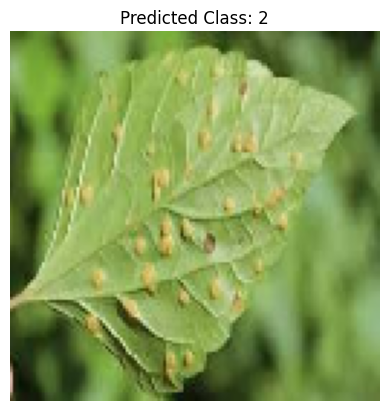

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image
img_path = "img.jpg"  # koi bhi tomato/leaf image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Show image + prediction
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis("off")
plt.show()
